In [47]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import sys
sys.path.append('...')

# camera calibration
CHESS_NX = 9
CHESS_NY = 6

TEST_DIR = "C:\\Users\\USER\\Documents\\GitHub\\LaneDetection\\images\\Roads"
CALIBRATION_DIR = "C:\\Users\\USER\\Documents\\GitHub\\LaneDetection\\camera_cal"

OUTPUT_DIR_CALIBRATION = "C:\\Users\\USER\\Documents\\GitHub\\LaneDetection\\output_images\\calibration"

In [27]:
os.listdir()

['.ipynb_checkpoints',
 'Camera_Calibration.ipynb',
 'CannyTrial v2.ipynb',
 'commonfunctions.py',
 'Histogram_Equalization.ipynb',
 'Hough transform.ipynb',
 'Precpective_Transform.ipynb',
 'ROI_Smoothing.ipynb',
 'sliding_window.ipynb',
 '__pycache__']

In [43]:
# define camera calibration

def calibrateCamera():
    # use chessboard photos to calibrate camera

    # set termination criteria (for use with cv2.cornerSubPix)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

    # make object points
    objp = np.zeros((CHESS_NX*CHESS_NY,3), np.float32)
    objp[:,:2] = np.mgrid[0:CHESS_NX,0:CHESS_NY].T.reshape(-1,2)
    imagePoints = []
    objectPoints = []

    # loop through calibration images
    for imageFile in os.listdir(CALIBRATION_DIR):
        if imageFile.endswith('.jpg'):

            # read image, grayscale, find corners
            im = cv2.imread(os.path.join(CALIBRATION_DIR,imageFile))
            gray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
            found, corners = cv2.findChessboardCorners(gray,(CHESS_NX,CHESS_NY),None)

            if found:
                # draw corners on image
                cv2.drawChessboardCorners(im,(CHESS_NX,CHESS_NY),corners,found)
                # find corners with higher (sub-pixel) precision
                corners2 = cv2.cornerSubPix(gray,corners,(5,5),(-1,-1),criteria)
                imagePoints.append(corners2)
                objectPoints.append(objp)

                # save image with corners marked
                cv2.imwrite(os.path.join(OUTPUT_DIR_CALIBRATION,imageFile),im)

    # do the actual calibration and save
    ret, mtx, dst, rvecs, tvecs = cv2.calibrateCamera(objectPoints,imagePoints,gray.shape[::-1],None,None)
    imSize = im.shape
    calibrationData = {'cam_matrix':mtx, 'dist_coeffs':dst, 'im_size':imSize}


    return mtx,dst

Calibrating camera...


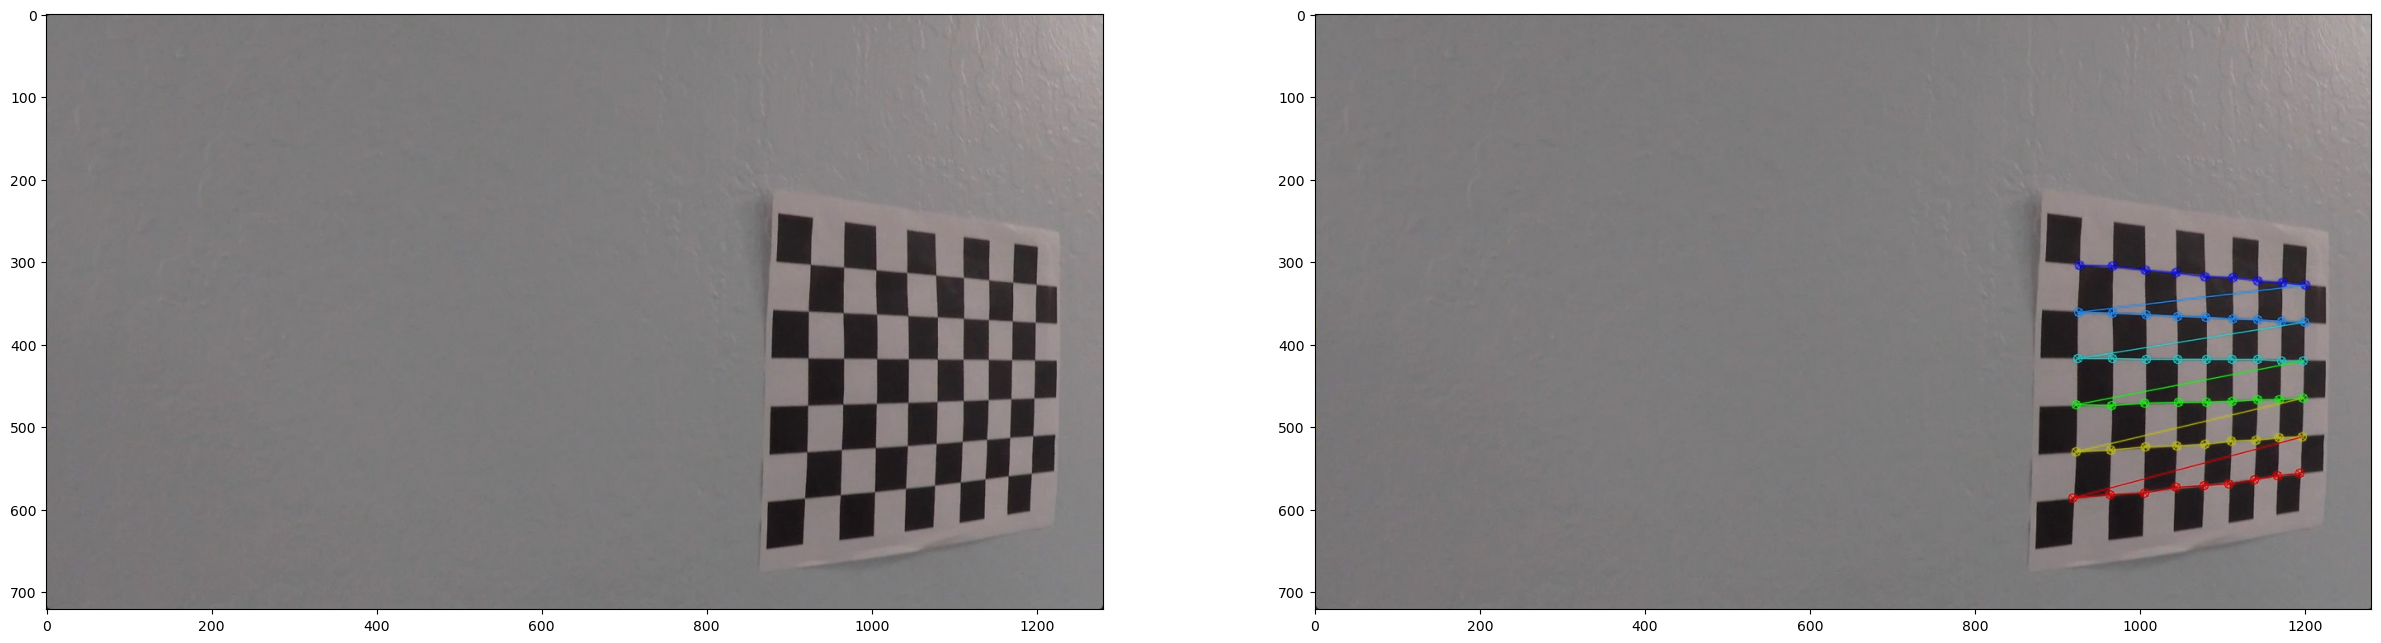

In [44]:
# do camera calibration and display example images

print("Calibrating camera...")
mtx,dst = calibrateCamera()
filenameList = [fn for fn in os.listdir(CALIBRATION_DIR) if fn.endswith('.jpg')]
fn = random.choice(filenameList)
imOriginal = cv2.imread(os.path.join(CALIBRATION_DIR,fn))
imCorners = cv2.imread(os.path.join(OUTPUT_DIR_CALIBRATION,fn))

f = plt.figure(figsize=(30,40))
ax = f.add_subplot(1,2,1)
ax.imshow(imOriginal)
ax = f.add_subplot(1,2,2)
ax.imshow(imCorners)
plt.show()


Undistorting image...


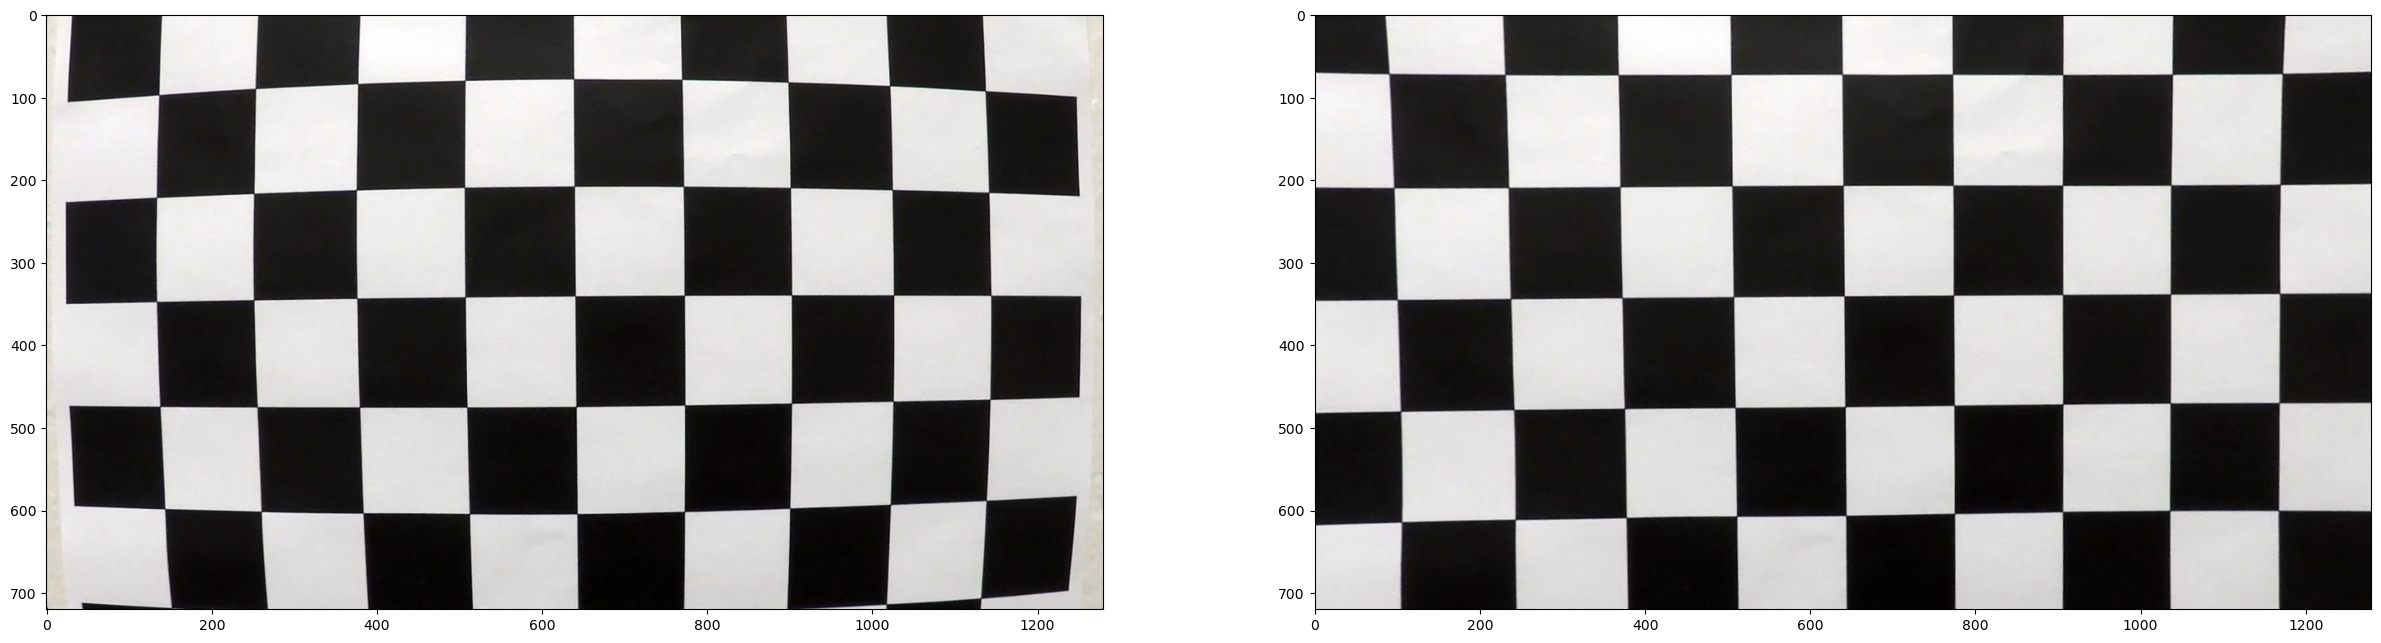

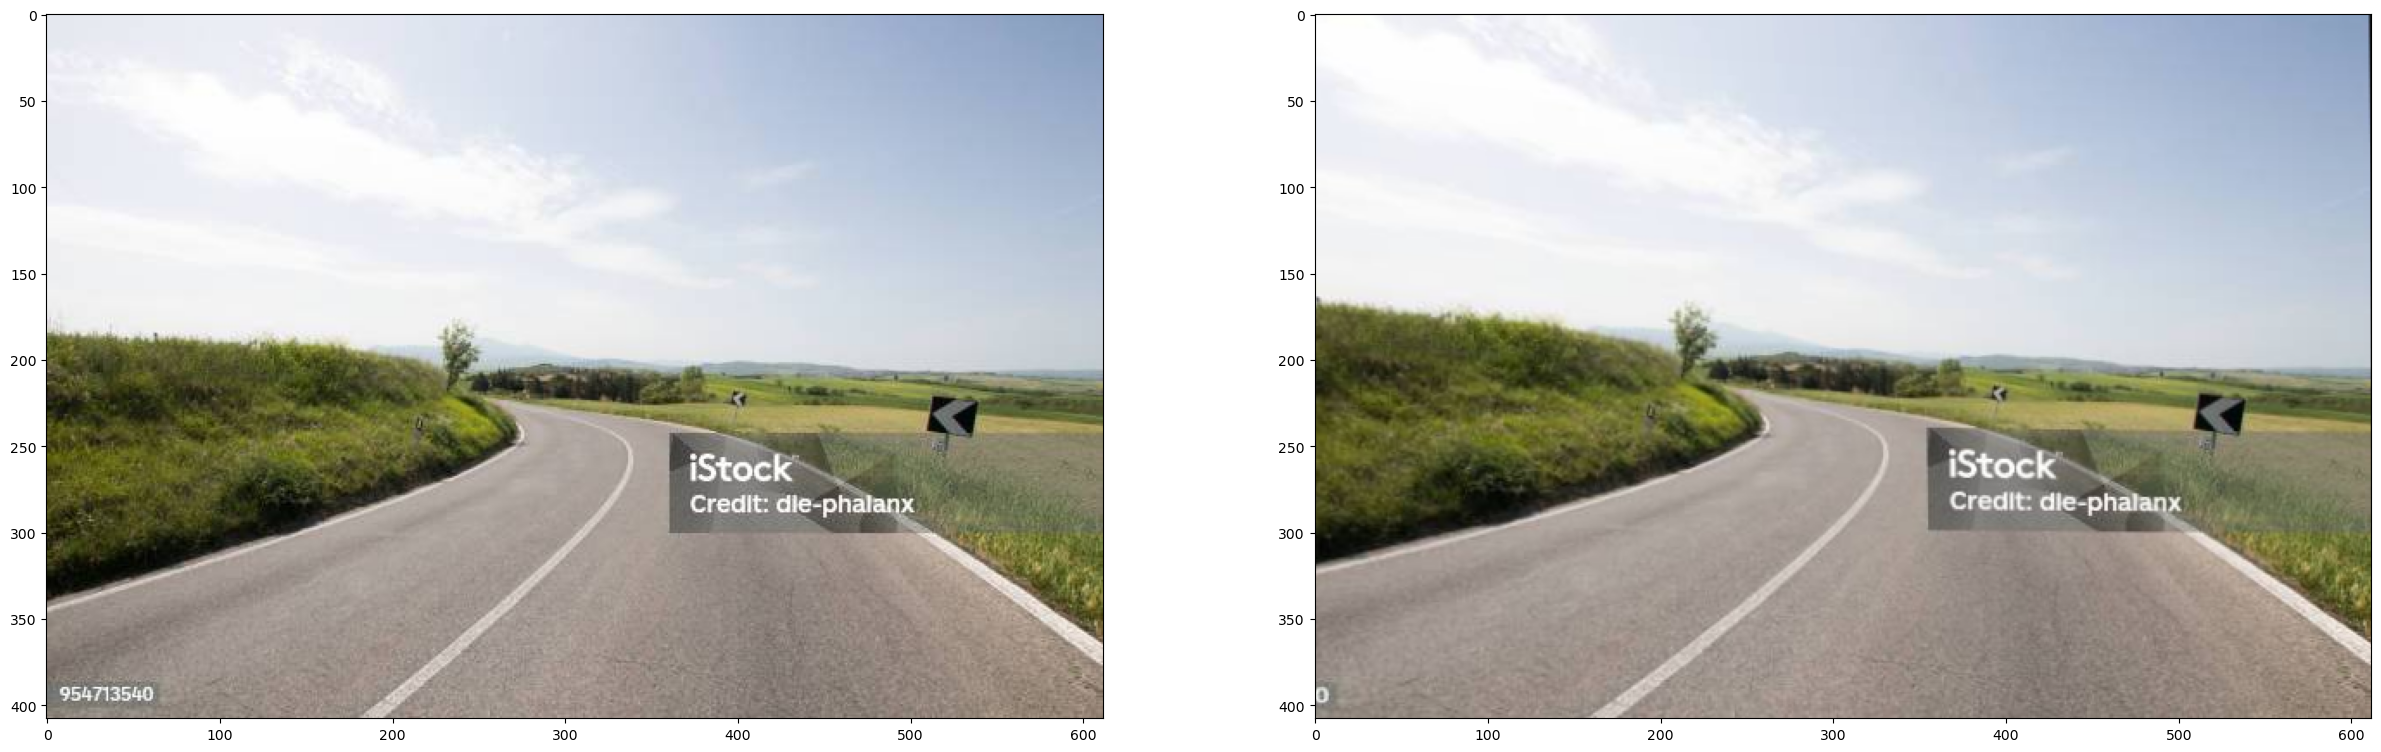

In [51]:
# display undistorted image example

print("Undistorting image...")
fn = os.path.join(CALIBRATION_DIR,'calibration1.jpg')
imCB = cv2.imread(fn)
imCB = cv2.cvtColor(imCB,cv2.COLOR_BGR2RGB)
imCBUndistorted = cv2.undistort(imCB,mtx,dst)
f2 = plt.figure(figsize=(30,40))
ax = f2.add_subplot(1,2,1)
ax.imshow(imCB)
ax = f2.add_subplot(1,2,2)
ax.imshow(imCBUndistorted)
plt.show()

filenameList = [fn for fn in os.listdir(TEST_DIR) if fn.endswith('.jpg')]
fn = random.choice(filenameList)
imOriginal = cv2.imread(os.path.join(TEST_DIR,fn))
imOriginalRGB = cv2.cvtColor(imOriginal,cv2.COLOR_BGR2RGB)
imUndistorted = cv2.undistort(imOriginalRGB,mtx,dst)
f3 = plt.figure(figsize=(30,40))
ax = f3.add_subplot(1,2,1)
ax.imshow(imOriginalRGB)
ax = f3.add_subplot(1,2,2)
ax.imshow(imUndistorted)
plt.show()